# TEAM 3 BIG DATA PROJECT

### GROUP MEMBERS:
1. Charles Nana Kwakye - r0879035
2. Emmanuel Akpandara - r0879038
3. Arthur Birate Kabanza - r0889635

### PROJECT DESCRIPTION:
The goal of our Big Data project is to develop an image classification app and an NLP app integrated into Streamlit. The primary focus for the first part of the project will be on classifying images related to 5 different Seabirds, Additionally, we will tackle the toxic comment dataset from Kaggle using a Transformer model for the NLP aspect in the second part of this project.

### Part A: Image Classification
#### A.1 Selecting Dataset

We built a scraper on python which we used to scrape 5 classes of sea birds which are ducks, geese, pelicans, penguins and storks.
We conducted an exploratory data analysis on the dataset to ensure quality images and equal number of images per class for training.

#### A.2 Modelling Using Fastai


##### A.2.1
In this part a data loader template is made and we used our dataset on it. We were able to create our first Model with finetuning and later shoing the loss to learning rate graph, confusion matrix, training/validation plot and and some inferences to images it hasn't seen before.


##### A.2.2
Our second Model was tweaked with mixed precision training, additional data augumentation, explicit application of transforms after batch processing and a more extended fine-tuning process. This resulted in better results on the graphs, some inferencing was also done as well.

##### A.2.3

We also trained our dataset on Google's Teachable machine and some inferencing was done as well.


#### A.3 Deployment on Streamlit
A functionality was implemented to test the presaved model wich allowed users to upload images for classification.
Additionally, we created an API endpoint around the model using FastAPI.

### Part B: Natural Language Processing:



# **A.1 Selecting Dataset**

### Sea Bird Scraper

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

In [ ]:
def image_scrapper(base_url,limit_page=None, prefix=None ,primary_html_tag=None, primary_selector=None, primary_class_name=None,
                   secondary_html_tag=None, secondary_selector=None, 
                   secondary_class_name=None,output_folder=None, custom_data=None, max_counter=None):
    

    for number_page in range(1,limit_page):
    
        url=f"{base_url}{prefix}page={number_page}"

        get_sites = requests.get(url)  

        # print(get_sites)


        if not os.path.exists(output_folder):
            os.mkdir(output_folder)
            
        soup = BeautifulSoup(get_sites.content, 'html.parser')

        get_container = soup.find(primary_html_tag,{primary_selector:primary_class_name})
     
        get_images_tags =  get_container.find_all(secondary_html_tag,{secondary_selector:secondary_class_name})
        
        # print(get_container)
        images = []
        images.append(len(get_images_tags))
        print(len(get_images_tags))

       
        for i, image in  enumerate(get_images_tags):                      

                img = image["src"]

                part = img.split('.svg')[0]

                format_img = "{}.jpeg".format(part)
                flag = requests.get(format_img)
                with open(f"{output_folder}/{custom_data}{number_page}_{i}.jpeg", 'ab') as file:
                    file.write(flag.content)


In [ ]:
## Scrapping images of pelicans from vista.com 
site_url = "https://create.vista.com/photos/pelicans/"
limit_page = 5
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="pelicans"
custom_data="pelican"



pelicans = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

In [ ]:
## Scrapping images of ducks from vista.com 
site_url = "https://create.vista.com/photos/ducks/"
limit_page = 6
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="ducks"
custom_data="duck"



ducks = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

In [ ]:
## Scrapping images of ducks from vista.com 
site_url = "https://create.vista.com/photos/geese/"
limit_page = 6
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="geeses"
custom_data="geese"



geeses = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

In [ ]:
## Scrapping images of ducks from vista.com 
site_url = "https://create.vista.com/photos/storks/"
limit_page = 5
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="storks"
custom_data="stork"



storks = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

In [ ]:
## Scrapping images of ducks from vista.com 
site_url = "https://create.vista.com/photos/penguins/"
limit_page = 6
prefix = "?"
primary_html_tag = "div"
primary_selector = "class"
primary_class_name = "assetsListWrapper-oDy7b"
secondary_html_tag="img"
secondary_selector="class"
secondary_class_name="media-3IiMe"
output_folder="penguins"
custom_data="penguin"



penguins = image_scrapper(site_url ,limit_page,prefix,primary_html_tag,primary_selector,primary_class_name,
             secondary_html_tag ,secondary_selector,secondary_class_name,output_folder,custom_data)

### Exploratory Data Analysis

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install seaborn 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
import shutil

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the path to the "Seabirds" directory
seabirds_dir = 'SeaBirds'

# Get a list of subdirectories in the "Seabirds" directory
subdirectories = [name for name in os.listdir(
    seabirds_dir) if os.path.isdir(os.path.join(seabirds_dir, name))]

# Count the number of images in each subdirectory
image_counts = {}
for subdir in subdirectories:
    subdir_path = os.path.join(seabirds_dir, subdir)
    image_files = [name for name in os.listdir(
        subdir_path) if os.path.isfile(os.path.join(subdir_path, name))]
    image_counts[subdir] = len(image_files)


#display image "eda_count" in eda_images
image_path = 'eda_images/eda_count.png'
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

### Balancing the data

Looking at the data, we can see that the categories are not balanced, some searbirds have 500 images while some have 400. We will have to balance the data before training the model to prevent the model from being biased towards the categories with more images.

In [ ]:
# Determine the target number of images (the lowest count among all categories)
target_count = min(image_counts.values())

# Identify categories with counts exceeding the target
excess_categories = [subdir for subdir,
                     count in image_counts.items() if count > target_count]

# Reduce the number of images for categories with more than the target count
for subdir in excess_categories:
    subdir_path = os.path.join(seabirds_dir, subdir)
    images_to_keep = random.sample(os.listdir(subdir_path), target_count)

    # Move the selected images to a temporary directory
    temp_dir = './temp'
    os.makedirs(temp_dir, exist_ok=True)
    for image in images_to_keep:
        shutil.move(os.path.join(subdir_path, image),
                    os.path.join(temp_dir, image))

    # Remove the remaining images in the original directory
    for image in os.listdir(subdir_path):
        os.remove(os.path.join(subdir_path, image))

    # Move the selected images back to the original directory
    for image in os.listdir(temp_dir):
        shutil.move(os.path.join(temp_dir, image),
                    os.path.join(subdir_path, image))

    # Remove the temporary directory
    os.rmdir(temp_dir)

# Print the subdirectory names and the number of images in each after reduction
image_counts_after_reduction = {subdir: len(os.listdir(
    os.path.join(seabirds_dir, subdir))) for subdir in subdirectories}
for subdir, count in image_counts_after_reduction.items():
    print(f"{subdir.capitalize()} = {count}")

# Create a bar chart to visualize the image counts after reduction
plt.bar(image_counts_after_reduction.keys(),
        image_counts_after_reduction.values())
plt.xlabel('Seabirds')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Subdirectory (After Reduction)')
plt.xticks(rotation=45)
plt.ylim(0, target_count)  # Set the y-axis limit to the target count
plt.show()

In [ ]:
import os
import random
import shutil
import matplotlib.pyplot as plt

# Function to categorize image sizes into small, medium, and large


def categorize_image_size(image_path):
    # Implement your logic to determine the image size category
    # For example, you can use the image dimensions for simplicity
    # Modify this function based on your specific requirements
    # Here, I'm assuming 'small', 'medium', and 'large' based on width and height
    # Adjust the thresholds accordingly
    # You can replace this with actual size calculation
    image_size = os.path.getsize(image_path)
    if image_size < 10000:  # Adjust the threshold for 'small'
        return 'small'
    elif 10000 <= image_size < 50000:  # Adjust the thresholds for 'medium'
        return 'medium'
    else:
        return 'large'


# Define the categories
categories = ['small', 'medium', 'large']

# Dictionary to store image counts for each category
image_counts_by_category = {category: {
    subdir: 0 for subdir in subdirectories} for category in categories}

# Loop through each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(seabirds_dir, subdir)

    # Loop through each image in the subdirectory
    for image in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, image)

        # Categorize the image size
        size_category = categorize_image_size(image_path)

        # Increment the count for the corresponding category and subdirectory
        image_counts_by_category[size_category][subdir] += 1

# Print the image counts for each category and subdirectory
for category in categories:
    print(f"Category: {category.capitalize()}")
    for subdir, count in image_counts_by_category[category].items():
        print(f"{subdir.capitalize()} = {count}")

# Rest of the original code for image reduction and plotting
# ...

# Create a bar chart to visualize the image counts for each category
bar_width = 0.25
bar_positions = range(len(subdirectories))

for i, category in enumerate(categories):
    counts = [image_counts_by_category[category][subdir]
              for subdir in subdirectories]
    plt.bar([pos + i * bar_width for pos in bar_positions],
            counts, width=bar_width, label=category.capitalize())

plt.xlabel('Seabirds')
plt.ylabel('Number of Images by sizes')
plt.title('Number of Images in Each Subdirectory by Category by Sizes')
plt.xticks([pos + (len(categories) - 1) * bar_width /
           2 for pos in bar_positions], subdirectories, rotation=45)
plt.legend()
plt.show()

# **A.2 Modelling Using Fastai**

The fast book is imported and set up


In [ ]:
# This line uses the exclamation mark (!) to run a shell command from within a Jupyter notebook or an IPython environment. 
!pip install -Uqq fastbook 
# : Similar to the first line, this installs the scikit-learn library using the pip package manager.
!pip install scikit-learn
# imports the fastbook module into the Python 
import fastbook
# : This line calls the setup_book function from the fastbook module. T
fastbook.setup_book()
#  Similar to the first line, this installs or upgrades the fastai library using the pip package manager. 
!pip install -Uqq fastai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
# This line imports all the symbols (functions, classes, etc.) from the fastbook package. 
from fastbook import *
# This line imports all symbols from the fastai.vision.widgets module. In this case, it specifically imports widgets related to computer vision tasks. 
from fastai.vision.widgets import *


Next we unzip the zip file containing the sea birds

In [ ]:
!unzip SeaBirdsData.zip

Archive:  SeaBirdsData.zip
  inflating: SeaBirds/.DS_Store      
   creating: SeaBirds/ducks/
  inflating: SeaBirds/ducks/duck1_0.jpeg  
  inflating: SeaBirds/ducks/duck1_1.jpeg  
  inflating: SeaBirds/ducks/duck1_11.jpeg  
  inflating: SeaBirds/ducks/duck1_12.jpeg  
  inflating: SeaBirds/ducks/duck1_14.jpeg  
  inflating: SeaBirds/ducks/duck1_17.jpeg  
  inflating: SeaBirds/ducks/duck1_18.jpeg  
  inflating: SeaBirds/ducks/duck1_2.jpeg  
  inflating: SeaBirds/ducks/duck1_20.jpeg  
  inflating: SeaBirds/ducks/duck1_21.jpeg  
  inflating: SeaBirds/ducks/duck1_24.jpeg  
  inflating: SeaBirds/ducks/duck1_25.jpeg  
  inflating: SeaBirds/ducks/duck1_26.jpeg  
  inflating: SeaBirds/ducks/duck1_28.jpeg  
  inflating: SeaBirds/ducks/duck1_30.jpeg  
  inflating: SeaBirds/ducks/duck1_32.jpeg  
  inflating: SeaBirds/ducks/duck1_33.jpeg  
  inflating: SeaBirds/ducks/duck1_34.jpeg  
  inflating: SeaBirds/ducks/duck1_35.jpeg  
  inflating: SeaBirds/ducks/duck1_36.jpeg  
  inflating: SeaBirds/ducks/d

Now I try to pull up an image of a duck, just to see if it is there in the directory

In [ ]:
# If you want to use option2:
path = '/content/SeaBirds/'

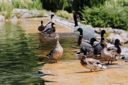

In [ ]:
from PIL import Image

im = Image.open(path + 'ducks/duck1_0.jpeg')
# This line resizes the image to a thumbnail version with a size of 128x128 pixels. The to_thumb() method is a convenience method in Pillow that resizes the image while preserving its aspect ratio
im.to_thumb(128,128)

The variable *filenames* is made that contains a listing of all paths to all files in the birds folder

In [ ]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#2000) [Path('/content/SeaBirds/pelicans/pelican2_96.jpeg'),Path('/content/SeaBirds/pelicans/pelican3_91.jpeg'),Path('/content/SeaBirds/pelicans/pelican1_61.jpeg'),Path('/content/SeaBirds/pelicans/pelican4_68.jpeg'),Path('/content/SeaBirds/pelicans/pelican3_8.jpeg'),Path('/content/SeaBirds/pelicans/pelican2_78.jpeg'),Path('/content/SeaBirds/pelicans/pelican2_55.jpeg'),Path('/content/SeaBirds/pelicans/pelican4_57.jpeg'),Path('/content/SeaBirds/pelicans/pelican1_99.jpeg'),Path('/content/SeaBirds/pelicans/pelican3_21.jpeg')...]

All images are checked, to make sure none of them are corrupt files:

In [ ]:
# function to retrieve a list of file paths for image files in the specified directory, which is represented by the variable path. The get_image_files function is a utility function in fastai that scans a directory recursively and returns a list of file paths for all the image files it finds
failed = verify_images(filenames)
failed

(#0) []

# **A.2.1**

Next I use a wrapper class from Fastai, Dataloaders, which wrapped around our images from training and validation which enables other fastai

###Dataloader creation
  With our dataloader created, we specified the types of data blocks to use, this being an ImageBlock for handling image data and a CategoryBlock for handling categorical labels.

Next we defined how to get the items (file paths) for the dataset by using the get_image_files function, which retrieves image files from a given directory.A RandomSplitter is used to randomly split the data into training and validation sets.

20% of the data will be used for validation, and seed=42 ensures that it is can be reproduced.

We then used the parent_label function to get the label based on the parent directory of each image.

Item transformations are then applied to the data. it resizes each image to a square of size 128x128 using the Resize transformation and randomizes the cropping.

In [ ]:
# creates an instance of the DataBlock class and assigns it to the variable seaBirdsDls. This DataBlock will be used to organize and process data for training a model
seaBirdsDls = DataBlock(
    # Specifies the types of data the DataBlock will handle. In this case, it's a tuple of two blocks: ImageBlock for handling image data and CategoryBlock for handling categorical labels (e.g., categories/classes
    blocks=(ImageBlock, CategoryBlock),
    # Specifies a function (get_image_files) to obtain a list of items (in this case, file paths to image files) that the DataBlock will work with. The get_image_files function is used to automatically grab image files from a specified directory.
    get_items=get_image_files,
    #  Defines a data split strategy. It uses RandomSplitter to randomly split the data into training and validation sets. The valid_pct=0.2 parameter specifies that 20% of the data will be used for validation
    # The seed parameter allows you to set a specific value (in this case, 42) for the random number generator. When you set a seed, the sequence of random numbers generated will be the same every time you run the code
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    #  Specifies a function (parent_label) to obtain the labels (categories) for the items. In this case, it assumes that the items are images organized in folders, and the folder name is the label
    get_y=parent_label,
    #  a transformation that randomly crops and resizes the input images to a size of 128x128 pixels, with a minimum scale of 0.3.
    item_tfms=RandomResizedCrop(128, min_scale=0.3))


Now we have our custom DataLoader template for our SeaBirds. Next we give our dls the path to where it can find the sea birds images.

In [ ]:
dls = seaBirdsDls.dataloaders(path)
# seaBirdsDls is the DataBlock instance that you defined earlier. It contains all the information about how to organize and process your data
# .dataloaders(path): This method call on the DataBlock generates a DataLoaders object. It takes a path as an argument, indicating where your data is located
# path: This is the directory path where your dataset is stored. The dataloaders method will use the information specified in seaBirdsDls to organize and load the data from this path.

Then we check if we can access our sea birds

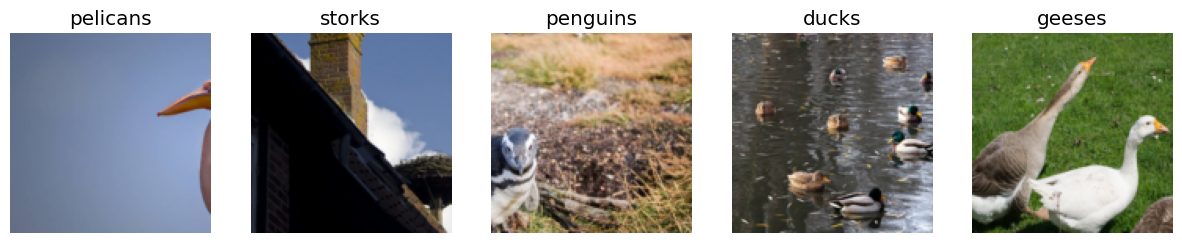

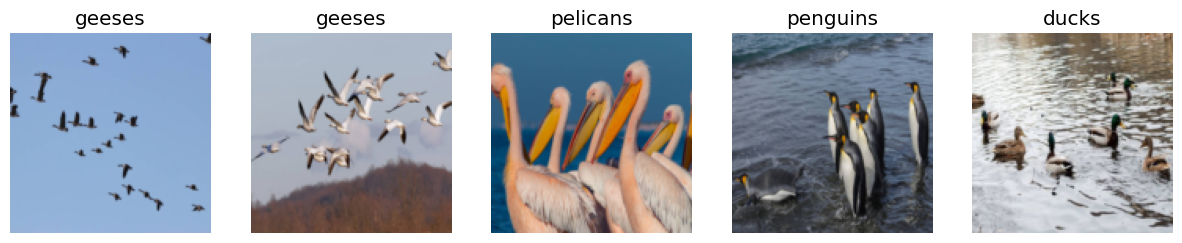

In [ ]:
dls.train.show_batch(max_n=5, nrows=1)
# dls.train: This accesses the training dataloader within the DataLoaders object (dls).
# .show_batch(max_n=5, nrows=1): This method displays a batch of images from the training dataset.
# max_n=5: Specifies the maximum number of images to display in the batch (in this case, 5 images).
# nrows=1: Specifies the number of rows in the display (in this case, 1 row).
dls.valid.show_batch(max_n=5, nrows=1)

<h2>First Model</h2>
This model uses the vgg16_bn architecture,
a learner is set up with the architecture, a DataLoader (dls), and an error rate metric,
After creation, the model is then fine-tuned for 2 additional epochs, adapting it to our dataset

In [ ]:
vgg16_model = vision_learner(dls, vgg16_bn, metrics=error_rate)
vgg16_model.fine_tune(2)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:08<00:00, 61.8MB/s]


These are good numbers for the confusion matrix, the true positives for the different categories are much higher than other numbers.

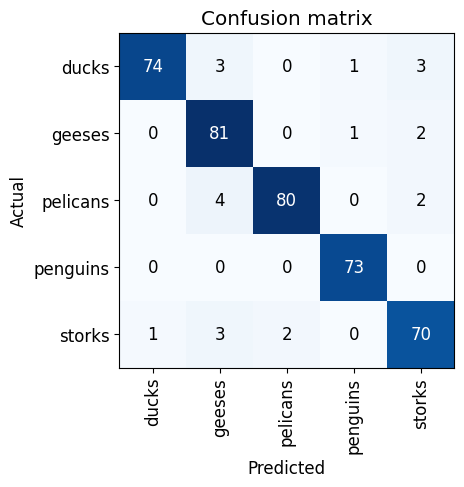

In [ ]:
interp = ClassificationInterpretation.from_learner(vgg16_model)
interp.plot_confusion_matrix()

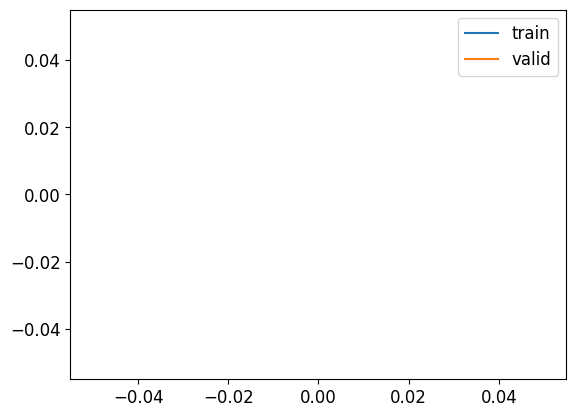

In [ ]:
vgg16_model.recorder.plot_loss()

As you can tell in the learning rate chart, the loss is pretty low, about 0.16 with a learning rate of around 10-3.5

SuggestedLRs(valley=0.0002754228771664202)

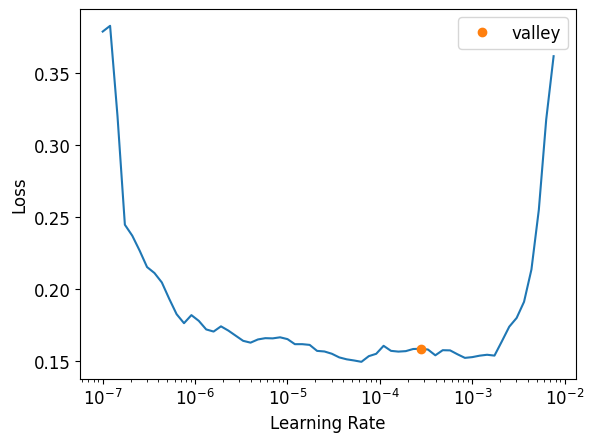

In [ ]:
vgg16_model.lr_find()

In [ ]:
# saving our model, by default in a folder called 'models'.
vgg16_model.save('first_model')
#creating a serialized pickle object of our model, the export.pkl file
export_file_name = 'first_model.pkl'
vgg16_model.export(export_file_name)


Below, a prediction is made on a duck which shows a probability of about 80%/.

Prediction: ducks, Probability: 0.8067


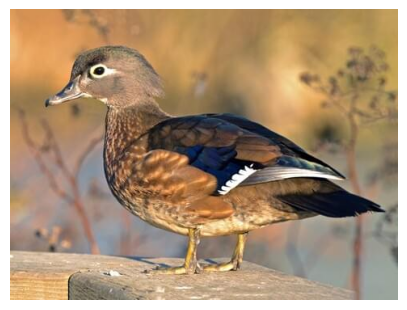

In [ ]:
from fastai.vision.all import *

img = PILImage.create('/content/CustomPredict/duckpredict.jpg')
img.show()

# Make a prediction
pred, pred_idx, probs = vgg16_model.predict(img)
print(f"Prediction: {vgg16_model.dls.vocab[pred_idx]}, Probability: {probs[pred_idx]:.4f}")

# **A.2.2**
<h2>Second Model</h2>


In  this model some advanced learning options are applied, '**to_fp16( )**' uses mixed precision learning which allows faster training with reduced memory requirements. When the model is created, fine-tuning is performed which is a form of transfer learning, in here we freeze the early layers of the model for 3 epochs and train the later layers for 6 epochs.

In [ ]:
from fastai.callback.fp16 import *
vgg16_adv_tweaked = vision_learner(dls, vgg16_bn, metrics=error_rate).to_fp16()
vgg16_adv_tweaked.fine_tune(6, freeze_epochs=3)

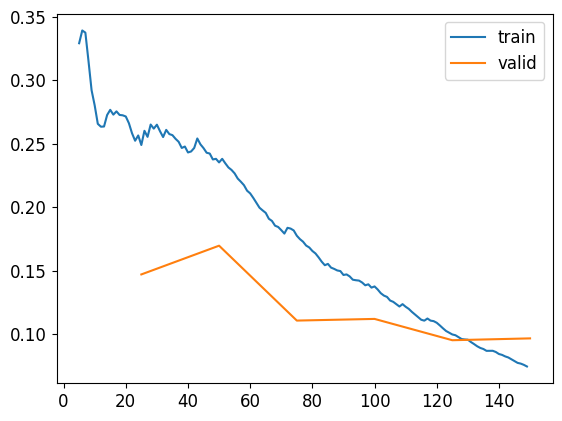

In [ ]:
vgg16_adv_tweaked.recorder.plot_loss()

In [ ]:


vgg16_adv_tweaked = vision_learner(dls, vgg16_bn, metrics=error_rate).to_fp16()
tfms = aug_transforms()
dls.after_batch(tfms)
vgg16_adv_tweaked.fine_tune(6, freeze_epochs=3)




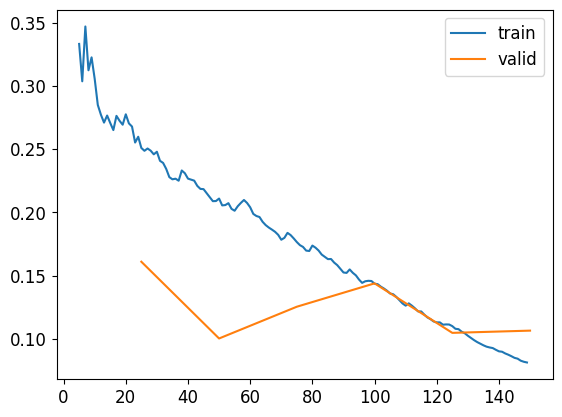

In [ ]:
vgg16_adv_tweaked.recorder.plot_loss()

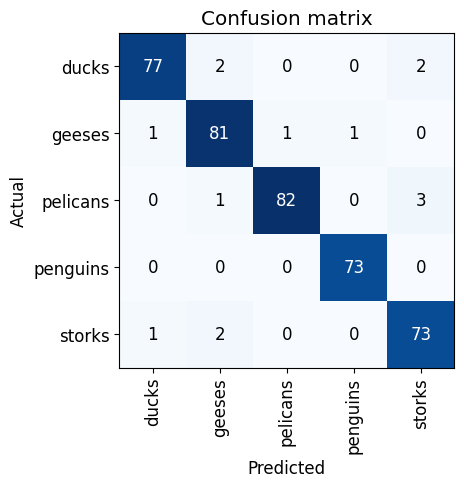

In [ ]:
interp = ClassificationInterpretation.from_learner(vgg16_adv_tweaked)
interp.plot_confusion_matrix()

SuggestedLRs(valley=1.4454397387453355e-05)

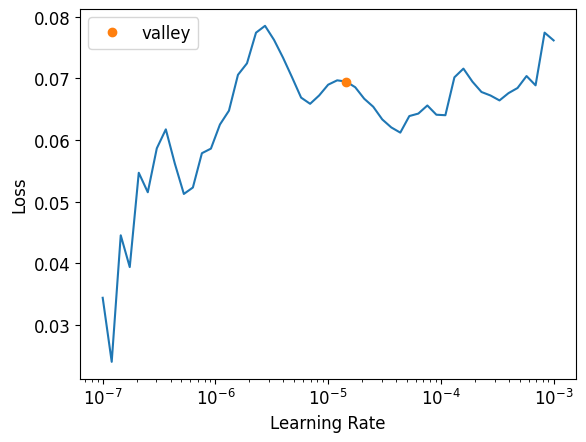

In [ ]:
vgg16_adv_tweaked.lr_find()

In [ ]:
# saving our model, by default in a folder called 'models'.
vgg16_adv_tweaked.save('second_model')
#creating an serialized pickle object of our model, the export.pkl file
export_file_name = 'second_model.pkl'
#creating an serialized pickle object of our model, the export.pkl file
vgg16_adv_tweaked.export(export_file_name)


Prediction: ducks, Probability: 0.9220


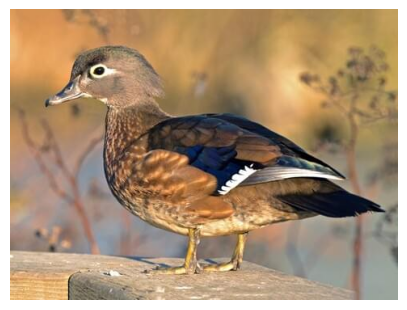

In [ ]:
from fastai.vision.all import *

img = PILImage.create('/content/CustomPredict/duckpredict.jpg')
img.show()

# Make a prediction
pred, pred_idx, probs = vgg16_adv_tweaked.predict(img)
print(f"Prediction: {vgg16_adv_tweaked.dls.vocab[pred_idx]}, Probability: {probs[pred_idx]:.4f}")

Comparing with Google

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/GooglesModel/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/GooglesModel/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/CustomPredict/duckpredict.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 2s 2s/step
Class: Duck
Confidence Score: 0.9978974


In [ ]:
#show image google confusion matrix



### Part B: Natural Language Processing:

Make sure you manually download the export.pkl file (and the first_model.pth if need be)! Because Colab will remove files in its session memory after the session is complete. Plus, later on, we will run a Flask API service on our local machine, so we need the serialized model.

In [ ]:
ls

export.pkl  gdrive/  models/  sample_data/  SeaBirds/  SeaBirdsData.zip


# **Loading a model & inference:**

In [ ]:
vgg16_inference = load_learner('export.pkl')
# let's test our model on an image
# our_out_of_the_box_model_inference.predict(path + 'cat/cat.1.jpg')
# this will return the predicted category, the index of this predicted category, and the probabilities of each category

('cat', tensor(0), tensor([0.9940, 0.0060]))

In [ ]:
our_out_of_the_box_model_inference.dls.vocab

['cat', 'dog']

Alright! So we can load our serialized model, hand it an image, and it will return a prediction.

Next step is ofcourse making a Python API wrapper around this model, so we can use JSON to upload an image, and get the predictions returned. This is where Flask comes in! Flask is a Python micro framework, with a really easy to use API wrapper.

Now, you should already have enough information to go ahead and build a prototype of your Computer Vision project assignment! You could even start to research a little bit around Flask API and how they are used to 'deploy', or provide an interface to, a serialized (pickle) Deep Learning model...